In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
image_path = "papers.png"

image = cv2.imread(image_path)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

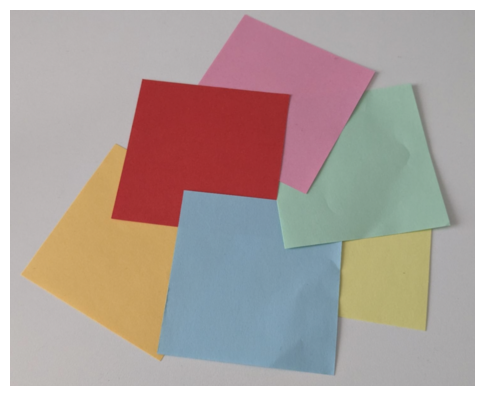

In [3]:
plt.figure(figsize=(6,6))
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

In [6]:
image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(image_hsv)

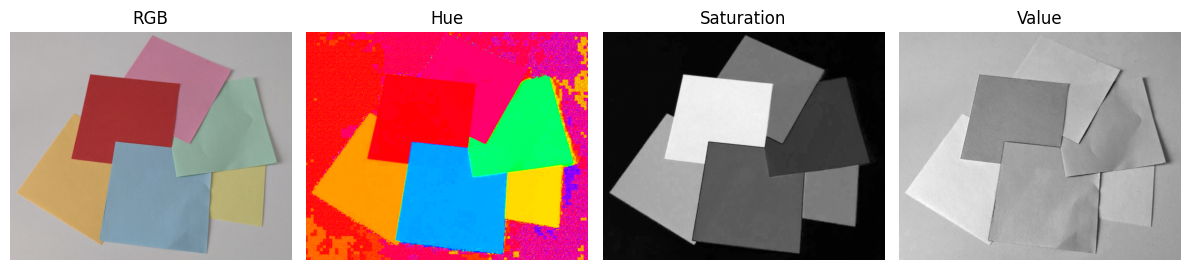

In [7]:
# Plot
plt.figure(figsize=(12, 4))

# Original RGB
plt.subplot(1, 4, 1)
plt.imshow(image_rgb)
plt.title("RGB")
plt.axis("off")

# Hue
plt.subplot(1, 4, 2)
plt.imshow(h, cmap='hsv')
plt.title("Hue")
plt.axis("off")

# Saturation
plt.subplot(1, 4, 3)
plt.imshow(s, cmap='gray')
plt.title("Saturation")
plt.axis("off")

# Value
plt.subplot(1, 4, 4)
plt.imshow(v, cmap='gray')
plt.title("Value")
plt.axis("off")

plt.tight_layout()
plt.show()

In [16]:
# CLAHE stands for Contrast Limited Adaptive Histogram Equalization
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
s_eq = clahe.apply(s)
s_blur = cv2.bilateralFilter(s_eq, d=7, sigmaColor=50, sigmaSpace=50)

# Edge detection on Saturation
# ---- Canny ----
med = np.median(s_blur)
lower = int(max(0, 0.66 * med))
upper = int(min(255, 1.33 * med))
edges_canny = cv2.Canny(s_blur, lower, upper)

# ---- Sobel magnitude ----
gx = cv2.Sobel(s_blur, cv2.CV_32F, 1, 0, ksize=3)
gy = cv2.Sobel(s_blur, cv2.CV_32F, 0, 1, ksize=3)
mag = cv2.magnitude(gx, gy)
edges_sobel = np.uint8(255 * (mag / (mag.max() + 1e-6)))

# Optional cleanup (closing small gaps)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
edges_canny_clean = cv2.morphologyEx(edges_canny, cv2.MORPH_CLOSE, kernel)
edges_sobel_clean = cv2.morphologyEx(edges_sobel, cv2.MORPH_CLOSE, kernel)

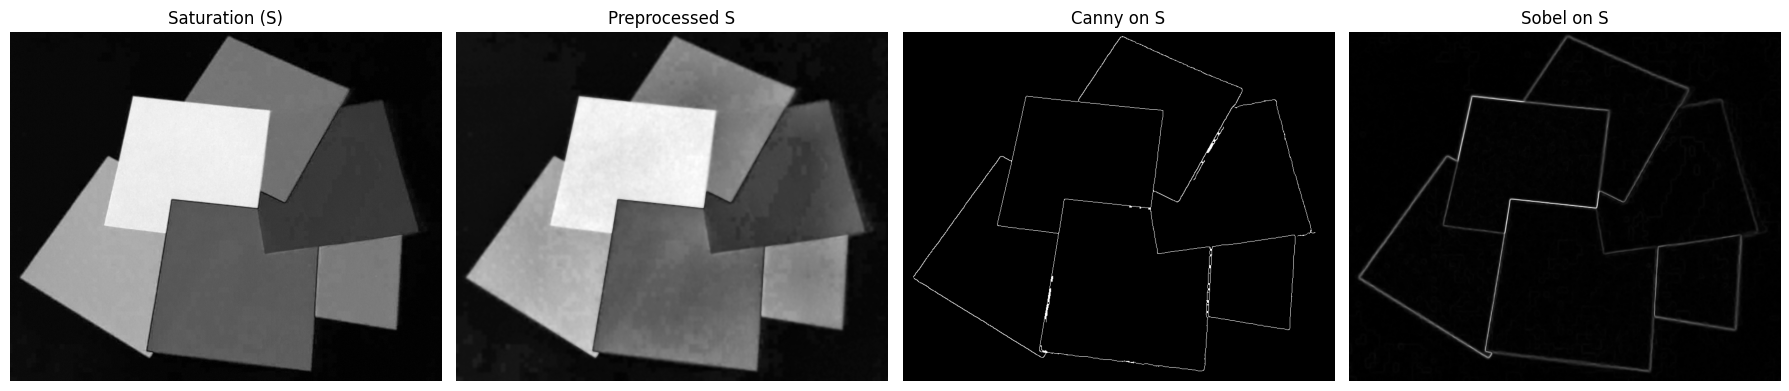

In [17]:
fig, axes = plt.subplots(1, 4, figsize=(18, 4))

axes[0].imshow(s, cmap='gray')
axes[0].set_title("Saturation (S)")
axes[0].axis("off")

axes[1].imshow(s_blur, cmap='gray')
axes[1].set_title("Preprocessed S")
axes[1].axis("off")

axes[2].imshow(edges_canny_clean, cmap='gray')
axes[2].set_title("Canny on S")
axes[2].axis("off")

axes[3].imshow(edges_sobel_clean, cmap='gray')
axes[3].set_title("Sobel on S")
axes[3].axis("off")

plt.tight_layout()
plt.show()

# Results

* Why color space conversion is useful in image processing?  ==> Different task required different environments. Eg. for edge detection using saturation gives good results

* What H, S, and V values represent?  ==> H = Hue, Color Tone | S = Stauration, Vividness, | V = Value, Brightness
